In [38]:
import numpy as np
import pylab as pl

import time
from IPython.display import display, clear_output

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
np.random.seed(333)

In [40]:
random_1 = np.random.randn(2,100)

In [41]:
random_1.shape

(2, 100)

In [42]:
random_2 = np.random.randn(2,100) + 2

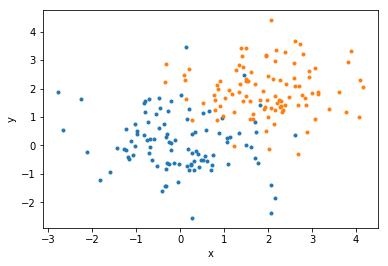

In [43]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. choose number of clusters

In [44]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [45]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
minval, maxval = min(random_stack[0]), max(random_stack[0])
np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

array([[ 2.1021121 ,  1.68612748],
       [-0.31853161,  0.21688838]])

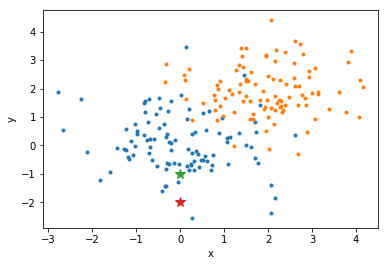

In [46]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [47]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [48]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. Calc new centers

In [49]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

('old center\n', array([[ 0., -1.],
       [ 0., -2.]]), '\nnew center\n', array([[ 0.96972306,  1.06522176],
       [ 1.02400655, -2.10176012]]))


In [50]:
centers[0][0] != newc[0][0] and centers[0][1] != newc[0][1] and centers[1][0] != newc[1][0] and centers[1][1] != newc[1][1]

True

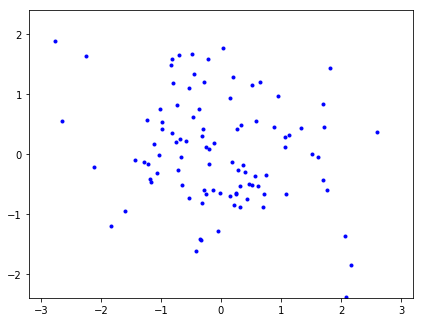

In [51]:
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))
particles, = ax.plot([], [], 'bo', ms=6)
particles.set_data(random_1[0], random_1[1])
particles.set_markersize(3)

# 5. Iterate until convergence

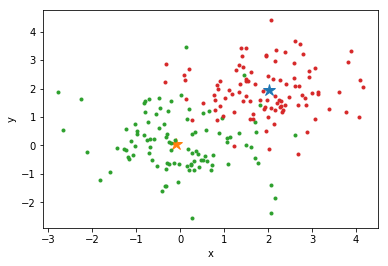

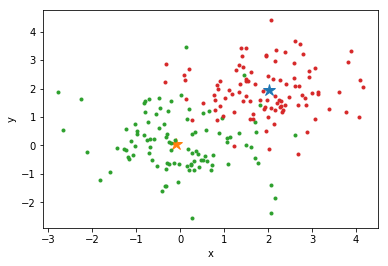

In [52]:
fig, ax = plt.subplots()
a, = ax.plot([],[],"*",markersize=12)
b, = ax.plot([],[],"*",markersize=12)
ax.set_xlabel("x")
ax.set_ylabel("y")
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')

while(centers[0][0] != newc[0][0] and centers[0][1] != newc[0][1] and centers[1][0] != newc[1][0] and centers[1][1] != newc[1][1]):
    centers = newc
    cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
    cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

    newc = np.array(
        [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
            np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
    print ("old center\n", centers, "\nnew center\n", newc)

    a.set_data(centers[0,0], centers[0,1])
    b.set_data(centers[1,0], centers[1,1])
    time.sleep(2)
    clear_output(wait=True)
    display(fig)